# Exposure Triangle

In [1]:
import chainladder as cl
import pandas as pd

Although triangles have both origin and development attributes, it is often
convenient to create premium or exposure vectors that can work with loss
triangles.  The `Triangle` class treats the development parameter as
optional. This example instantiates a 'premium' triangle as a single vector.


In [4]:

# Raw premium data in pandas
premium_df = pd.DataFrame(
    {'AccYear':[item for item in range(1977, 1988)],
     'premium': [3000000]*11})

# Create a premium 'triangle' with no development
premium = cl.Triangle(premium_df, origin='AccYear', columns='premium')
premium

,1987
1977,"3,000,000"
1978,"3,000,000"
1979,"3,000,000"
1980,"3,000,000"
1981,"3,000,000"
1982,"3,000,000"
1983,"3,000,000"
1984,"3,000,000"
1985,"3,000,000"
1986,"3,000,000"


In [5]:
# Create some loss triangle
loss = cl.load_sample('abc')
ultimate = cl.Chainladder().fit(loss).ultimate_

loss_ratios = (ultimate / premium).to_frame()

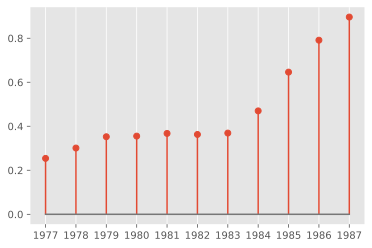

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

fig, ax = plt.subplots()
plt.stem(loss_ratios.index.astype(str), loss_ratios.iloc[:, 0])
ax.grid(axis='y')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
plt.show();

In [ ]:
from myst_nb import glue
glue("plot_exposure_triangle", fig, display=False)